In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.datasets import make_circles
import keras
from keras.utils import np_utils
from keras.layers import Dense, Activation ##layers is weights..
# dense means fully interconnected and hence for 3->2, we have 6 weights..
from keras.models import Sequential

In [12]:
X, y = make_circles(n_samples=1000, factor=0.4)
print (X.shape, y.shape)

(1000, 2) (1000,)


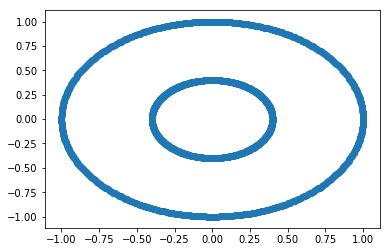

In [13]:
plt.scatter(X[:,0], X[:,1])
plt.show()

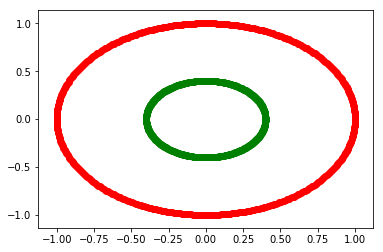

In [14]:
 for ix in range(X.shape[0]):
        if y[ix] == 0:
            plt.scatter(X[ix,0], X[ix,1], color='red')
        else:
            plt.scatter(X[ix,0], X[ix,1], color='green')
            
plt.show()

In [18]:
Y =np_utils.to_categorical(y)
print (Y.shape)

for ix in range(10):
    print (Y[ix], "---", y[ix])

(1000, 2)
[0. 1.] --- 1
[0. 1.] --- 1
[1. 0.] --- 0
[1. 0.] --- 0
[1. 0.] --- 0
[0. 1.] --- 1
[0. 1.] --- 1
[0. 1.] --- 1
[1. 0.] --- 0
[1. 0.] --- 0


In [20]:
split = int(0.8* X.shape[0])
X_train=X[:split]
X_test=X[split:]

y_train = Y[:split]
y_test = Y[split:]

print (X_train.shape)

(800, 2)


In [58]:
## NN in Keras:
model=Sequential()
model.add(Dense(5,input_shape=(2,)))
model.add(Activation('relu'))

model.add(Dense(2,input_shape=(2,)))
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 5)                 15        
_________________________________________________________________
activation_7 (Activation)    (None, 5)                 0         
_________________________________________________________________
dense_10 (Dense)             (None, 2)                 12        
_________________________________________________________________
activation_8 (Activation)    (None, 2)                 0         
Total params: 27
Trainable params: 27
Non-trainable params: 0
_________________________________________________________________


In [63]:
model2 = Sequential()

model2.add(Dense(2,input_shape=(2,)))
for ix in range(5):
    model2.add(Dense(5)) #cant hardcode, write fn or expression..
model2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 2)                 6         
_________________________________________________________________
dense_18 (Dense)             (None, 5)                 15        
_________________________________________________________________
dense_19 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_20 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_21 (Dense)             (None, 5)                 30        
_________________________________________________________________
dense_22 (Dense)             (None, 5)                 30        
Total params: 141
Trainable params: 141
Non-trainable params: 0
_________________________________________________________________


In [59]:
# we have 15 parameters due to presence of bias terms also..
#bias is particular to each node & is trainable..

In [60]:
model.compile(optimizer='adagrad', loss='categorical_crossentropy', metrics=['accuracy'])

In [61]:
hist=model.fit(X_train,y_train, nb_epoch =500,batch_size=100,verbose=2,shuffle=True,validation_data=(X_test,y_test))
# verbose kind of flag to print no. of log lines..

c:\python\python36\lib\site-packages\keras\models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 800 samples, validate on 200 samples
Epoch 1/500
 - 1s - loss: 0.6321 - acc: 0.5300 - val_loss: 0.6242 - val_acc: 0.5850
Epoch 2/500
 - 0s - loss: 0.6160 - acc: 0.5875 - val_loss: 0.6118 - val_acc: 0.6800
Epoch 3/500
 - 0s - loss: 0.6051 - acc: 0.6625 - val_loss: 0.6011 - val_acc: 0.7300
Epoch 4/500
 - 0s - loss: 0.5947 - acc: 0.7250 - val_loss: 0.5915 - val_acc: 0.7600
Epoch 5/500
 - 0s - loss: 0.5865 - acc: 0.7875 - val_loss: 0.5839 - val_acc: 0.8000
Epoch 6/500
 - 0s - loss: 0.5796 - acc: 0.8212 - val_loss: 0.5774 - val_acc: 0.8050
Epoch 7/500
 - 0s - loss: 0.5737 - acc: 0.8413 - val_loss: 0.5718 - val_acc: 0.8050
Epoch 8/500
 - 0s - loss: 0.5689 - acc: 0.8588 - val_loss: 0.5670 - val_acc: 0.8250
Epoch 9/500
 - 0s - loss: 0.5643 - acc: 0.8750 - val_loss: 0.5626 - val_acc: 0.8500
Epoch 10/500
 - 0s - loss: 0.5601 - acc: 0.8800 - val_loss: 0.5583 - val_acc: 0.8550
Epoch 11/500
 - 0s - loss: 0.5560 - acc: 0.8912 - val_loss: 0.5542 - val_acc: 0.8750
Epoch 12/500
 - 0s - loss: 0

Epoch 97/500
 - 0s - loss: 0.3690 - acc: 1.0000 - val_loss: 0.3637 - val_acc: 1.0000
Epoch 98/500
 - 0s - loss: 0.3676 - acc: 1.0000 - val_loss: 0.3622 - val_acc: 1.0000
Epoch 99/500
 - 0s - loss: 0.3661 - acc: 1.0000 - val_loss: 0.3608 - val_acc: 1.0000
Epoch 100/500
 - 0s - loss: 0.3647 - acc: 1.0000 - val_loss: 0.3594 - val_acc: 1.0000
Epoch 101/500
 - 0s - loss: 0.3632 - acc: 1.0000 - val_loss: 0.3579 - val_acc: 1.0000
Epoch 102/500
 - 0s - loss: 0.3618 - acc: 1.0000 - val_loss: 0.3565 - val_acc: 1.0000
Epoch 103/500
 - 0s - loss: 0.3603 - acc: 1.0000 - val_loss: 0.3550 - val_acc: 1.0000
Epoch 104/500
 - 0s - loss: 0.3590 - acc: 1.0000 - val_loss: 0.3536 - val_acc: 1.0000
Epoch 105/500
 - 0s - loss: 0.3575 - acc: 1.0000 - val_loss: 0.3522 - val_acc: 1.0000
Epoch 106/500
 - 0s - loss: 0.3562 - acc: 1.0000 - val_loss: 0.3508 - val_acc: 1.0000
Epoch 107/500
 - 0s - loss: 0.3548 - acc: 1.0000 - val_loss: 0.3495 - val_acc: 1.0000
Epoch 108/500
 - 0s - loss: 0.3534 - acc: 1.0000 - val_lo

Epoch 193/500
 - 0s - loss: 0.2619 - acc: 1.0000 - val_loss: 0.2559 - val_acc: 1.0000
Epoch 194/500
 - 0s - loss: 0.2610 - acc: 1.0000 - val_loss: 0.2550 - val_acc: 1.0000
Epoch 195/500
 - 0s - loss: 0.2602 - acc: 1.0000 - val_loss: 0.2542 - val_acc: 1.0000
Epoch 196/500
 - 0s - loss: 0.2594 - acc: 1.0000 - val_loss: 0.2533 - val_acc: 1.0000
Epoch 197/500
 - 0s - loss: 0.2585 - acc: 1.0000 - val_loss: 0.2525 - val_acc: 1.0000
Epoch 198/500
 - 0s - loss: 0.2577 - acc: 1.0000 - val_loss: 0.2516 - val_acc: 1.0000
Epoch 199/500
 - 0s - loss: 0.2569 - acc: 1.0000 - val_loss: 0.2508 - val_acc: 1.0000
Epoch 200/500
 - 0s - loss: 0.2561 - acc: 1.0000 - val_loss: 0.2500 - val_acc: 1.0000
Epoch 201/500
 - 0s - loss: 0.2553 - acc: 1.0000 - val_loss: 0.2491 - val_acc: 1.0000
Epoch 202/500
 - 0s - loss: 0.2545 - acc: 1.0000 - val_loss: 0.2483 - val_acc: 1.0000
Epoch 203/500
 - 0s - loss: 0.2537 - acc: 1.0000 - val_loss: 0.2475 - val_acc: 1.0000
Epoch 204/500
 - 0s - loss: 0.2529 - acc: 1.0000 - val

Epoch 289/500
 - 0s - loss: 0.1970 - acc: 1.0000 - val_loss: 0.1904 - val_acc: 1.0000
Epoch 290/500
 - 0s - loss: 0.1964 - acc: 1.0000 - val_loss: 0.1899 - val_acc: 1.0000
Epoch 291/500
 - 0s - loss: 0.1959 - acc: 1.0000 - val_loss: 0.1893 - val_acc: 1.0000
Epoch 292/500
 - 0s - loss: 0.1954 - acc: 1.0000 - val_loss: 0.1888 - val_acc: 1.0000
Epoch 293/500
 - 0s - loss: 0.1948 - acc: 1.0000 - val_loss: 0.1883 - val_acc: 1.0000
Epoch 294/500
 - 0s - loss: 0.1943 - acc: 1.0000 - val_loss: 0.1877 - val_acc: 1.0000
Epoch 295/500
 - 0s - loss: 0.1937 - acc: 1.0000 - val_loss: 0.1872 - val_acc: 1.0000
Epoch 296/500
 - 0s - loss: 0.1932 - acc: 1.0000 - val_loss: 0.1867 - val_acc: 1.0000
Epoch 297/500
 - 0s - loss: 0.1927 - acc: 1.0000 - val_loss: 0.1862 - val_acc: 1.0000
Epoch 298/500
 - 0s - loss: 0.1922 - acc: 1.0000 - val_loss: 0.1856 - val_acc: 1.0000
Epoch 299/500
 - 0s - loss: 0.1917 - acc: 1.0000 - val_loss: 0.1851 - val_acc: 1.0000
Epoch 300/500
 - 0s - loss: 0.1911 - acc: 1.0000 - val

Epoch 385/500
 - 0s - loss: 0.1539 - acc: 1.0000 - val_loss: 0.1480 - val_acc: 1.0000
Epoch 386/500
 - 0s - loss: 0.1535 - acc: 1.0000 - val_loss: 0.1477 - val_acc: 1.0000
Epoch 387/500
 - 0s - loss: 0.1532 - acc: 1.0000 - val_loss: 0.1473 - val_acc: 1.0000
Epoch 388/500
 - 0s - loss: 0.1528 - acc: 1.0000 - val_loss: 0.1470 - val_acc: 1.0000
Epoch 389/500
 - 0s - loss: 0.1524 - acc: 1.0000 - val_loss: 0.1466 - val_acc: 1.0000
Epoch 390/500
 - 0s - loss: 0.1521 - acc: 1.0000 - val_loss: 0.1463 - val_acc: 1.0000
Epoch 391/500
 - 0s - loss: 0.1517 - acc: 1.0000 - val_loss: 0.1459 - val_acc: 1.0000
Epoch 392/500
 - 0s - loss: 0.1513 - acc: 1.0000 - val_loss: 0.1456 - val_acc: 1.0000
Epoch 393/500
 - 0s - loss: 0.1510 - acc: 1.0000 - val_loss: 0.1452 - val_acc: 1.0000
Epoch 394/500
 - 0s - loss: 0.1506 - acc: 1.0000 - val_loss: 0.1449 - val_acc: 1.0000
Epoch 395/500
 - 0s - loss: 0.1503 - acc: 1.0000 - val_loss: 0.1445 - val_acc: 1.0000
Epoch 396/500
 - 0s - loss: 0.1499 - acc: 1.0000 - val

Epoch 481/500
 - 0s - loss: 0.1240 - acc: 1.0000 - val_loss: 0.1190 - val_acc: 1.0000
Epoch 482/500
 - 0s - loss: 0.1237 - acc: 1.0000 - val_loss: 0.1188 - val_acc: 1.0000
Epoch 483/500
 - 0s - loss: 0.1235 - acc: 1.0000 - val_loss: 0.1185 - val_acc: 1.0000
Epoch 484/500
 - 0s - loss: 0.1232 - acc: 1.0000 - val_loss: 0.1182 - val_acc: 1.0000
Epoch 485/500
 - 0s - loss: 0.1229 - acc: 1.0000 - val_loss: 0.1180 - val_acc: 1.0000
Epoch 486/500
 - 0s - loss: 0.1227 - acc: 1.0000 - val_loss: 0.1178 - val_acc: 1.0000
Epoch 487/500
 - 0s - loss: 0.1224 - acc: 1.0000 - val_loss: 0.1175 - val_acc: 1.0000
Epoch 488/500
 - 0s - loss: 0.1222 - acc: 1.0000 - val_loss: 0.1173 - val_acc: 1.0000
Epoch 489/500
 - 0s - loss: 0.1219 - acc: 1.0000 - val_loss: 0.1170 - val_acc: 1.0000
Epoch 490/500
 - 0s - loss: 0.1217 - acc: 1.0000 - val_loss: 0.1168 - val_acc: 1.0000
Epoch 491/500
 - 0s - loss: 0.1214 - acc: 1.0000 - val_loss: 0.1165 - val_acc: 1.0000
Epoch 492/500
 - 0s - loss: 0.1212 - acc: 1.0000 - val

In [43]:
from sklearn.linear_model import LogisticRegression

In [48]:
lr = LogisticRegression()

In [49]:
lr.fit(X_train,y[:split])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [50]:
lr.score(X_test,y[split:])

0.44

In [68]:
## storing initial or any specific layer weights.. using model/dense etc..

In [65]:
data=hist.history
print (data)

{'val_loss': [0.6241683959960938, 0.6117987036705017, 0.6010514497756958, 0.5914937257766724, 0.5838512480258942, 0.5774451792240143, 0.5718191564083099, 0.566985547542572, 0.5625506043434143, 0.5582985579967499, 0.5542102754116058, 0.5502225756645203, 0.5463790893554688, 0.5426768660545349, 0.5390562415122986, 0.5355345904827118, 0.5320850908756256, 0.5287350118160248, 0.5254576206207275, 0.5222737789154053, 0.5191401541233063, 0.5160987079143524, 0.5131106376647949, 0.5101537108421326, 0.5072392523288727, 0.5043734610080719, 0.5015491247177124, 0.4987790882587433, 0.49604831635951996, 0.4933723658323288, 0.4907390624284744, 0.4881485104560852, 0.4855717718601227, 0.48303091526031494, 0.4805173873901367, 0.47804689407348633, 0.47560031712055206, 0.47317829728126526, 0.4707860201597214, 0.46842896938323975, 0.4661092609167099, 0.46381548047065735, 0.4615418463945389, 0.4592934548854828, 0.4570637196302414, 0.4548630714416504, 0.45267416536808014, 0.4505058079957962, 0.44835178554058075

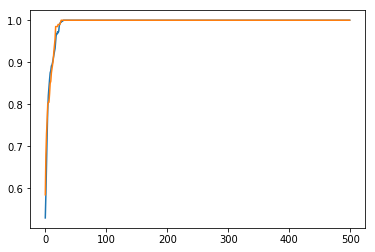

In [66]:
plt.plot(data['acc'])
plt.plot(data['val_acc'])
plt.show()